In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
from IPython.display import Image,display


In [225]:
os.listdir()



['20230320-1632-56_spectrum (1).dat',
 '20230320-1635-26_confocal_xy_image_norm_fig.png']

In [222]:

os.chdir('..')

In [224]:

os.chdir(os.listdir()[1])

In [69]:
extension = 'fig.png'
c_files = []
for f in os.listdir('Confocal'):
    if f.endswith(extension):
        c_files.append(f)


['20230321-1552-03_confocal_xy_image_norm_fig.png', '20230321-1604-06_confocal_xy_image_norm_fig.png', '20230321-1612-16_confocal_xy_image_norm_fig.png', '20230321-1621-03_confocal_xy_image_norm_fig.png', '20230321-1622-14_confocal_xy_image_norm_fig.png', '20230321-1631-00_confocal_xy_image_norm_fig.png', '20230321-1649-05_confocal_xy_image_norm_fig.png', '20230321-1655-39_confocal_xy_image_norm_fig.png', '20230321-1659-14_confocal_xy_image_norm_fig.png', '20230321-1708-31_confocal_xy_image_norm_fig.png', '20230321-1719-48_confocal_xy_image_norm_fig.png', '20230321-1730-45_confocal_xy_image_norm_fig.png']


In [76]:
s_files,c_files

(['20230321-1551-46_spectrum.dat',
  '20230321-1604-59_spectrum.dat',
  '20230321-1613-31_spectrum.dat',
  '20230321-1622-51_spectrum.dat',
  '20230321-1631-49_spectrum.dat',
  '20230321-1649-53_spectrum.dat',
  '20230321-1709-05_spectrum.dat',
  '20230321-1709-15_spectrum.dat',
  '20230321-1721-27_spectrum.dat',
  '20230321-1731-21_spectrum.dat'],
 ['20230321-1552-03_confocal_xy_image_norm_fig.png',
  '20230321-1604-06_confocal_xy_image_norm_fig.png',
  '20230321-1612-16_confocal_xy_image_norm_fig.png',
  '20230321-1621-03_confocal_xy_image_norm_fig.png',
  '20230321-1622-14_confocal_xy_image_norm_fig.png',
  '20230321-1631-00_confocal_xy_image_norm_fig.png',
  '20230321-1649-05_confocal_xy_image_norm_fig.png',
  '20230321-1655-39_confocal_xy_image_norm_fig.png',
  '20230321-1659-14_confocal_xy_image_norm_fig.png',
  '20230321-1708-31_confocal_xy_image_norm_fig.png',
  '20230321-1719-48_confocal_xy_image_norm_fig.png',
  '20230321-1730-45_confocal_xy_image_norm_fig.png'])

In [73]:

len(c_files)

12

In [74]:
len(s_files)

10

In [77]:
s_exception = ['20230321-1709-05_spectrum.dat']
c_exception = ['20230321-1622-14_confocal_xy_image_norm_fig.png','20230321-1649-05_confocal_xy_image_norm_fig.png','20230321-1655-39_confocal_xy_image_norm_fig.png']

In [78]:
for i in c_exception:
    c_files.remove(i)
for j in s_exception:
    s_files.remove(j)

In [183]:
i=0

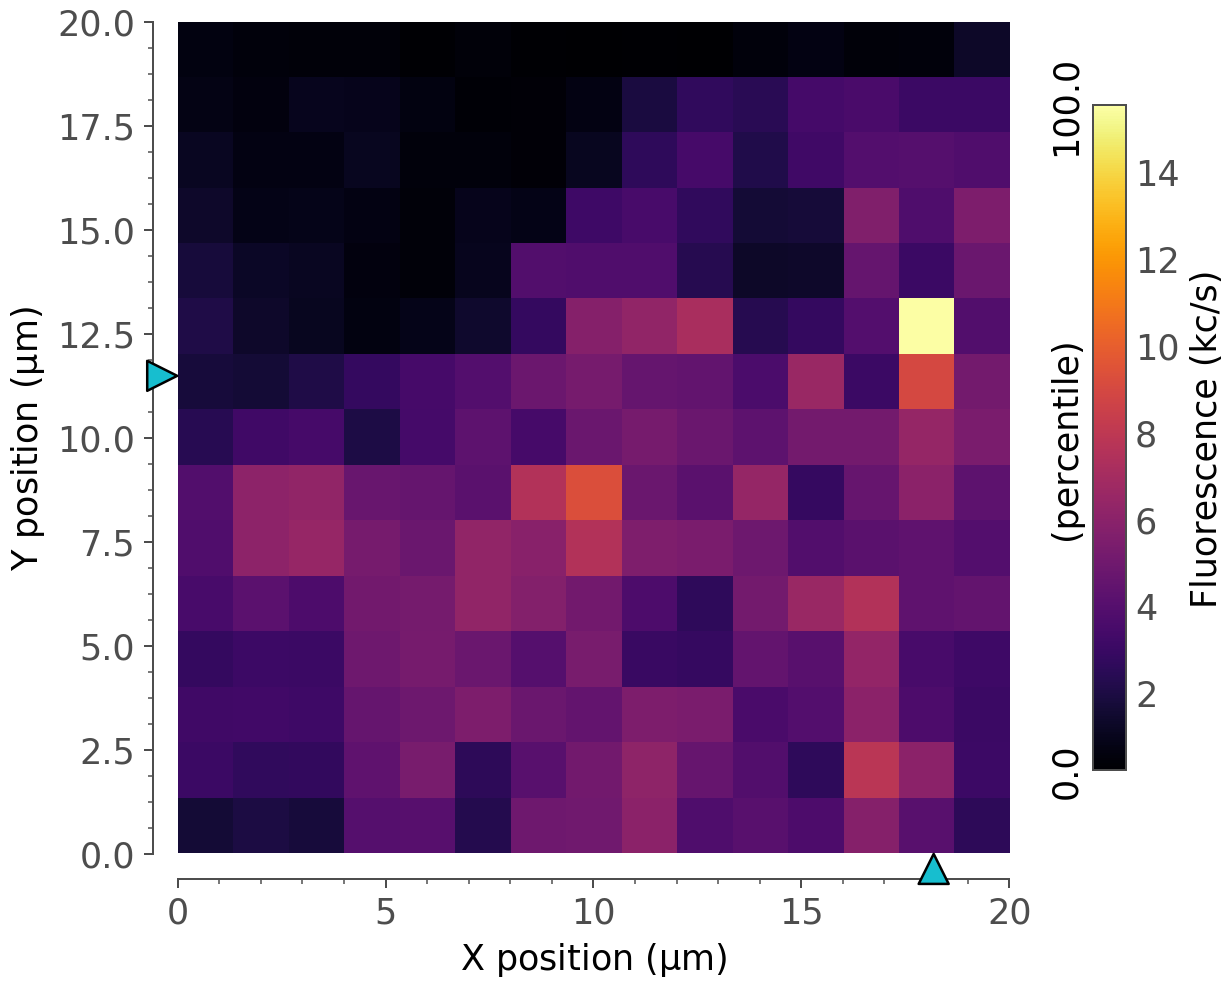

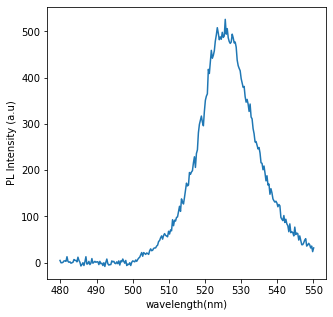

In [184]:
fig,ax1= plt.subplots(1, 1, figsize=(5, 5))
title =s_files[i]
d = 'spectra'
df = pd.read_csv(d+'/'+title, delim_whitespace=True,header=None, comment='#')
w = df.iloc[:,0]
c= df.iloc[:,1]
im = Image(filename = 'Confocal/'+c_files[i],width=400)
display(im)
ax1.plot(w,c)
ax1.set(xlabel = 'wavelength(nm)',ylabel='PL Intensity (a.u)',xlim=())
i+=1

In [136]:
title

'20230321-1709-15_spectrum.dat'

In [194]:
def lorentzian(x, a, x0,fwhm):
    gamma = fwhm / 2.0
    return a * gamma**2 / ((x - x0)**2 + gamma**2) 

In [197]:
x_min = 490
x_max = 550
w = df.iloc[:,0]
c= df.iloc[:,1]
c=c/max(c)
mask = (w > x_min) & (w < x_max)
p0 = [1, 500, 30] 
params, _ = curve_fit(lorentzian, w[mask], c[mask], p0=p0)

In [198]:
params

array([  0.99086301, 522.62117035,  14.73117071])

Text(529, 0.01, '523nm')

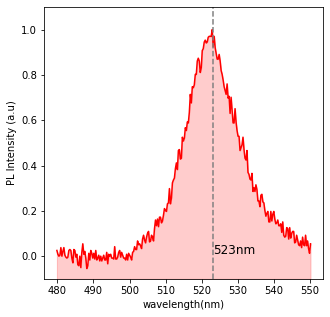

In [220]:
fig,ax1= plt.subplots(1, 1, figsize=(5, 5))
title =s_files[i]
d = 'spectra'
df = pd.read_csv(d+'/'+title, delim_whitespace=True,header=None, comment='#')
ax1.plot(w,c,color = 'red')
ax1.fill_between(w, -0.1, c, alpha=0.2, color='red')
ax1.set(xlabel = 'wavelength(nm)',ylabel='PL Intensity (a.u)',ylim=(-0.1,1.1))
ax1.axvline(x=523, linestyle='--', color='grey')
ax1.text(529, 0.01, '523nm', ha='center', fontsize=12)

Text(529, 0.01, '521nm')

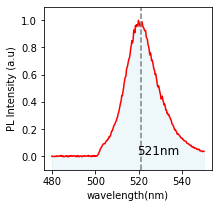

In [233]:
fig,ax1= plt.subplots(1, 1, figsize=(3, 3))
title =os.listdir()[0]
#d = 'spectra'
df = pd.read_csv(title, delim_whitespace=True,header=None, comment='#')
w = df.iloc[:,0]
c = df.iloc[:,1]/max(df.iloc[:,1])
ax1.plot(w,c,color = 'red')
ax1.fill_between(w, -0.1, c, alpha=0.2, color='lightblue')
ax1.set(xlabel = 'wavelength(nm)',ylabel='PL Intensity (a.u)',ylim=(-0.1,1.1))
ax1.axvline(x=521, linestyle='--', color='grey')
ax1.text(529, 0.01, '521nm', ha='center', fontsize=12)